# Multilayer Perceptron Visualization
### Joseph Coston & Douglas Newquist
Final Project for CSE 489 Machine Learning

11/13/2021

In [143]:
# standard imports
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# project imports
import generator
import mlp

In [144]:
# generate some random datapoints
N = 100
pc = generator.pointCloud2D(f = lambda x,y : (x+y-1 > 0), n=N)

Text(0.5, 0.98, 'Actual Point Output Values')

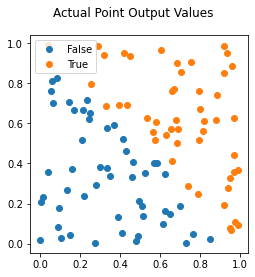

In [145]:
# plot the liearly separable distribution
fig, ax = pc.to_fig()
fig.suptitle('Actual Point Output Values')

In [146]:
# Example linear perceptron describing the line (x + y > 0)
s1 = mlp.Neuron([1,1.5], lambda x: x > 0, 0)
s1.evaluate((pc.data['x'][0],pc.data['y'][0]))

True

In [147]:
# visualize the output space
def visualize(o, dim, scale, mode='flatten'):
    if isinstance(o,mlp.Neuron) or isinstance(o, mlp.NeuralNetwork):
        plt.imshow(np.array(o.get_matrix(dim, scale)).T, origin='lower')
    elif isinstance(o, mlp.Layer):
        plt.imshow(np.array(o.get_matrix(dim, scale, mode)).T, origin='lower')
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.locator_params(axis="x", nbins=10)
    plt.locator_params(axis="y", nbins=10)
    ax.set_xticklabels((ax.get_xticks()-dim/2)*scale, rotation = 45)
    ax.set_yticklabels((ax.get_yticks()-dim/2)*scale, rotation = 45)

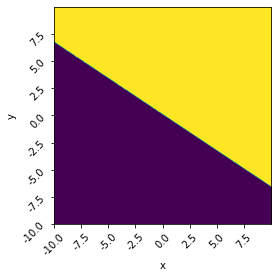

In [148]:
visualize(s1, 400, 0.05)

,Input,Layer 0,Output
0,1,True,False
1,1,False,None
2,None,True,None


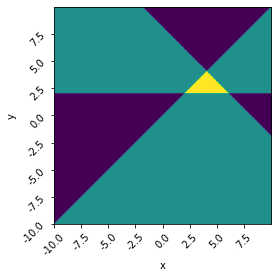

In [149]:
# Triangle with points (2,2), (4,4), (6,2)
line1 = mlp.Neuron([1, -1], lambda x: x >= 0, 0) # x - y >= 0
line2 = mlp.Neuron([0, 1], lambda x: x >= 0, -2) # y >= 2
line3 = mlp.Neuron([-1, -1], lambda x: x >= 0, 8) # -x -y + 8 >= 0

layer1 = mlp.Layer([line1, line2, line3])

all_neuron = mlp.Neuron([1,1,1], lambda x: x > 0, -2)
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.05, 'add') # visualize the hidden layer

triangle = mlp.NeuralNetwork([layer1, layer2])
triangle.evaluate((1, 1), True)

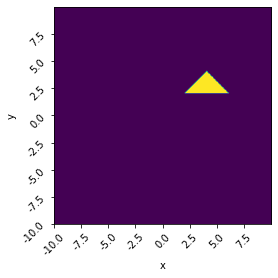

In [150]:
# visualize the output space
visualize(triangle, 400, 0.05)

,Input,Layer 0,Output
0,1,True,True
1,1,True,None
2,None,True,None
3,None,True,None


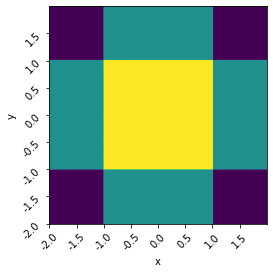

In [151]:
# square with vertices (-1,-1),(1,-1),(-1,1),(1,1)
line1 = mlp.Neuron([ 0,-1], lambda x: x >= 0, 1) #-y >= -1
line2 = mlp.Neuron([ 0, 1], lambda x: x >= 0, 1) # y >= -1
line3 = mlp.Neuron([-1, 0], lambda x: x >= 0, 1) #-x >= -1
line4 = mlp.Neuron([ 1, 0], lambda x: x >= 0, 1) # x >= -1

layer1 = mlp.Layer([line1, line2, line3, line4])

all_neuron = mlp.Neuron([1,1,1,1], lambda x: x > 0, -3) # AND all lines
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.01, 'add') # visualize the hidden layer


square = mlp.NeuralNetwork([layer1, layer2])
square.evaluate((1, 1), True)


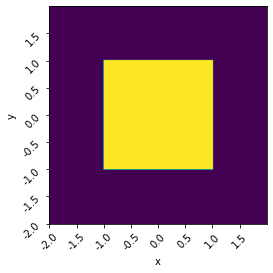

In [152]:
# visualize the output space
visualize(square, 400, 0.01)

In [153]:
def plot2D_network(n, x_range, y_range):
	for group in range(n.output_size):
		X = []
		Y = []
		for x in np.linspace(*x_range):
			for y in np.linspace(*y_range):
				if n.evaluate((x, y))[group]:
					X.append(x)
					Y.append(y)
		plt.scatter(X, Y)

	plt.axhline(0, color="black")
	plt.axvline(0, color="black")
	plt.xlabel("x")
	plt.ylabel("y")

In [154]:
# try more convex shapes 
# attempt complex shapes (chevron)
# attempt complex symbol
# linear activation functions
# possibly move to back prop later...

In [155]:
# points (-2,0),(2,0),(4,4),(-4,4) and (-2,0),(2,0),(4,-4),(-4,-4)

L1 = mlp.Neuron([0, 1], lambda x: x <= 0, -4)   # y <= 4
L2 = mlp.Neuron([-2, -1], lambda x: x <= 0, -4) # -2x -y -4 <= 0
L3 = mlp.Neuron([2, -1], lambda x: x <= 0, -4)  # 2x -y -4 <= 0 
L4 = mlp.Neuron([0, 1], lambda x: x >= 0, 0)    # y >= 0
L5 = mlp.Neuron([0, -1], lambda x: x > 0, 0)
L6 = mlp.Neuron([2, -1], lambda x: x >= 0, 4)   # 2x -y + 4 >= 0
L7 = mlp.Neuron([-2, -1], lambda x: x >= 0, 4)  # -2x -y + 4 >= 0
L8 = mlp.Neuron([0, 1], lambda x: x >= 0, 4)    # y >= -4

hourglass_lines = mlp.Layer([L1, L2, L3, L4, L5, L6, L7, L8])

trap1 = mlp.Neuron([1, 1, 1, 1, 0, 0, 0, 0], lambda x: x > 0, -3) # AND(L1, L2, L3, L4)
trap2 = mlp.Neuron([0, 0, 0, 0, 1, 1, 1, 1], lambda x: x > 0, -3) # AND(L5, L6, L7, L8)

hourglass_shapes = mlp.Layer([trap1, trap2])

or_neuron = mlp.Neuron([1, 1], lambda x: x > 0, 0)

hourglass = mlp.NeuralNetwork([hourglass_lines, hourglass_shapes, or_neuron])
hourglass.evaluate((0, -3), True)

,Input,Layer 0,Layer 1,Output
0,0,True,False,True
1,-3,True,True,None
2,None,True,None,None
3,None,False,None,None
4,None,True,None,None
5,None,True,None,None
6,None,True,None,None
7,None,True,None,None


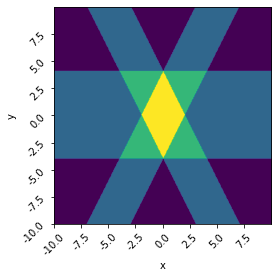

In [156]:
visualize(hourglass_lines, 400, 0.05, 'add')

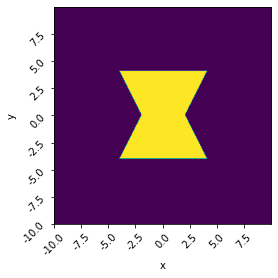

In [157]:
visualize(hourglass, 400, 0.05)

,Input,Layer 0,Output
0,1,True,True
1,1,True,None
2,None,False,None
3,None,True,None
4,None,True,None


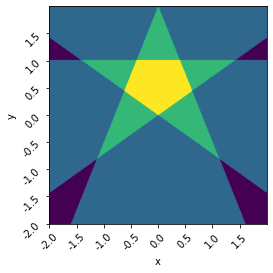

In [162]:
# star with vertices (
line1 = mlp.Neuron([  0,  1], lambda x: x <= 0, -1)   #        y - 1 <= 0
line2 = mlp.Neuron([ -5,  2], lambda x: x <= 0, -4)   # -5x + 2y - 4 <= 0
line3 = mlp.Neuron([  5,  2], lambda x: x <= 0, -4)   #  5x + 2y - 4 <= 0
line4 = mlp.Neuron([ 10,-14], lambda x: x <= 0, -0.1) # 10x -14y -.1 <= 0
line5 = mlp.Neuron([-10,-14], lambda x: x <= 0, -0.1) #-10x -14y -.1 <= 0

layer1 = mlp.Layer([line1, line2, line3, line4, line5])

all_neuron = mlp.Neuron([1,1,1,1,1], lambda x: x > 0, -3) # AND all partitions
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.01, 'add') # visualize the hidden layer


star = mlp.NeuralNetwork([layer1, layer2])
star.evaluate((1, 1), True)


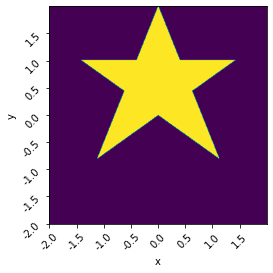

In [164]:
visualize(star, 400, 0.01)